In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/최종_동태_이상치처리후_train.csv",encoding='utf-8-sig')
df.head()

,회사명,거래소코드,회계년도,총자산경상이익률,총자산순이익률,금융비용/매출액,금융비용/총부채,순금융비용/매출액,매출액경상이익률,매출액순이익률,...,이익잉여금/총부채_변화량,이익잉여금/유동자산_변화량,현금비율_변화량,당좌비율_변화량,유동비율_변화량,유동부채회전율_변화량,총자산_변화량,매출액_변화량,고정자산_변화량,부실여부
0,(주)CMG제약_58820,58820,2013-12-01,1.40,0.52,0.0165,0.020759,0.016518,3.88,1.45,...,-0.207783,-0.254297,325.82,-39.24,1.22,1.316550,1.430400e+10,4.147000e+09,7.704000e+09,0.0
1,(주)CMG제약_58820,58820,2014-12-01,0.78,0.28,-0.0065,-0.018509,-0.006461,1.94,0.69,...,-3.337870,-0.485126,-293.39,-342.51,-370.13,-1.099866,4.800000e+08,2.351000e+09,1.206400e+10,0.0
2,(주)CMG제약_58820,58820,2015-12-01,-4.49,-6.37,-0.0011,-0.003166,-0.001109,-9.51,-13.50,...,0.552992,-0.295992,-72.24,-33.02,-27.73,0.446005,3.100000e+08,4.289000e+09,4.940000e+08,0.0
3,(주)CMG제약_58820,58820,2016-12-01,2.07,2.06,-0.0047,-0.015814,-0.004671,5.25,5.24,...,0.437456,-7428.352695,-5.48,556.96,565.30,0.552812,2.645600e+10,5.928000e+09,1.947000e+09,0.0
4,(주)CMG제약_58820,58820,2017-12-01,1.41,2.57,-0.0272,-0.105115,-0.027181,3.75,6.83,...,5.250437,0.000000,11.38,-118.51,-115.87,0.207839,2.651750e+10,8.566000e+09,-3.867000e+09,0.0


In [3]:
df["회계년도"] = pd.to_datetime(df["회계년도"])
df["회계년"] = df["회계년도"].dt.year

In [4]:
# train = df[df["회계년"] <= 2020].reset_index(drop='index')
# test  = df[df["회계년"] > 2020].reset_index(drop='index')
train = df.reset_index(drop='index')
train.columns

Index(['회사명', '거래소코드', '회계년도', '총자산경상이익률', '총자산순이익률', '금융비용/매출액', '금융비용/총부채',
       '순금융비용/매출액', '매출액경상이익률', '매출액순이익률', '자기자본경상이익률', '자기자본순이익률',
       'EBITDA/이자비용', 'EBIT/이자비용', '영업현금흐름/이자비용', '잉여현금흐름/총자산', '잉여현금흐름/총부채',
       '잉여현금흐름/이자비용', '부채상환계수', '자기자본비율', '유동자산/총자산', '이익잉여금/총자산', '이익잉여금/총부채',
       '이익잉여금/유동자산', '현금비율', '당좌비율', '유동비율', '유동부채회전율', '총자산', '매출액', '고정자산',
       '총자산경상이익률_변화량', '총자산순이익률_변화량', '금융비용/매출액_변화량', '금융비용/총부채_변화량',
       '순금융비용/매출액_변화량', '매출액경상이익률_변화량', '매출액순이익률_변화량', '자기자본경상이익률_변화량',
       '자기자본순이익률_변화량', 'EBITDA/이자비용_변화량', 'EBIT/이자비용_변화량', '영업현금흐름/이자비용_변화량',
       '잉여현금흐름/총자산_변화량', '잉여현금흐름/총부채_변화량', '잉여현금흐름/이자비용_변화량', '부채상환계수_변화량',
       '자기자본비율_변화량', '유동자산/총자산_변화량', '이익잉여금/총자산_변화량', '이익잉여금/총부채_변화량',
       '이익잉여금/유동자산_변화량', '현금비율_변화량', '당좌비율_변화량', '유동비율_변화량', '유동부채회전율_변화량',
       '총자산_변화량', '매출액_변화량', '고정자산_변화량', '부실여부', '회계년'],
      dtype='object')

In [5]:
col = df.columns[3:59]
train_1 = train[col]
# test_1 = test[col]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_1)

train_Min = scaler.transform(train_1)
# test_Min = scaler.transform(test_1)
train_Min = pd.DataFrame(train_Min,columns = train_1.columns)

In [7]:
train[col] = train_Min
# test[col] = test_Min

In [10]:
# 1-1 정규성 테스트(샤피로)
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for j in col:
    a = stats.shapiro(train_Min[j])
    p = a.pvalue
    print(j,a)

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


총자산경상이익률 ShapiroResult(statistic=0.9017041325569153, pvalue=0.0)
총자산순이익률 ShapiroResult(statistic=0.8834558725357056, pvalue=0.0)
금융비용/매출액 ShapiroResult(statistic=0.4513959288597107, pvalue=0.0)
금융비용/총부채 ShapiroResult(statistic=0.5805455446243286, pvalue=0.0)
순금융비용/매출액 ShapiroResult(statistic=0.47102248668670654, pvalue=0.0)
매출액경상이익률 ShapiroResult(statistic=0.41307616233825684, pvalue=0.0)
매출액순이익률 ShapiroResult(statistic=0.30977970361709595, pvalue=0.0)
자기자본경상이익률 ShapiroResult(statistic=0.7771726250648499, pvalue=0.0)
자기자본순이익률 ShapiroResult(statistic=0.7451024055480957, pvalue=0.0)
EBITDA/이자비용 ShapiroResult(statistic=0.38236039876937866, pvalue=0.0)
EBIT/이자비용 ShapiroResult(statistic=0.3823012113571167, pvalue=0.0)
영업현금흐름/이자비용 ShapiroResult(statistic=0.3826361298561096, pvalue=0.0)
잉여현금흐름/총자산 ShapiroResult(statistic=0.3122301697731018, pvalue=0.0)
잉여현금흐름/총부채 ShapiroResult(statistic=0.2600311040878296, pvalue=0.0)
잉여현금흐름/이자비용 ShapiroResult(statistic=0.3824685215950012, pvalue=0.0)
부채상환계수 

In [18]:
# 1-2 정규성 테스트(K-S)
for j in col:
    a = kstest(train_Min[j],'norm')
    p = a.pvalue
    print(j,a)

총자산경상이익률 KstestResult(statistic=0.5402924614535405, pvalue=0.0, statistic_location=0.1998035639118844, statistic_sign=-1)
총자산순이익률 KstestResult(statistic=0.5897314565736507, pvalue=0.0, statistic_location=0.3371108505926794, statistic_sign=-1)
금융비용/매출액 KstestResult(statistic=0.6733962530338785, pvalue=0.0, statistic_location=0.5111505122143419, statistic_sign=-1)
금융비용/총부채 KstestResult(statistic=0.6936311897863185, pvalue=0.0, statistic_location=0.6572315318655526, statistic_sign=-1)
순금융비용/매출액 KstestResult(statistic=0.6322615478159836, pvalue=0.0, statistic_location=0.39549221401014767, statistic_sign=-1)
매출액경상이익률 KstestResult(statistic=0.7298442814458941, pvalue=0.0, statistic_location=0.7325766266175611, statistic_sign=-1)
매출액순이익률 KstestResult(statistic=0.6913894289454943, pvalue=0.0, statistic_location=0.5804283355634327, statistic_sign=-1)
자기자본경상이익률 KstestResult(statistic=0.5828571983710049, pvalue=0.0, statistic_location=0.3065779169929522, statistic_sign=-1)
자기자본순이익률 KstestResult(s

In [8]:
train = train.reset_index(drop=True)
train_Min["부실여부"] = train["부실여부"]

In [11]:
# 부도기업과 정상기업의 피처별 등분산비교 (정규성 가정으로 bartlett)
Bad = train_Min[train_Min['부실여부']== 1] #Existing Customer
Good = train_Min[train_Min['부실여부']== 0] #Attrited Customer

c = []
for i in train_Min:
    # lresult = stats.levene(close[i], normal[i])
    lresult = stats.bartlett(Bad[i], Good[i])
    c.append([i,lresult[-1]])

c= pd.DataFrame(c)
c.columns=["피처값",'F-test']
c

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: invalid value encountered in scalar subtract
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,피처값,F-test
0,총자산경상이익률,9.623195e-67
1,총자산순이익률,8.650445e-18
2,금융비용/매출액,1.095247e-275
3,금융비용/총부채,6.966404e-222
4,순금융비용/매출액,7.319644e-271
5,매출액경상이익률,4.512629e-52
6,매출액순이익률,3.209472e-83
7,자기자본경상이익률,2.029163e-251
8,자기자본순이익률,2.347408e-276
9,EBITDA/이자비용,2.085884e-189


In [12]:
# F-test 결과 0.05 이상이면 homo 0.05 이하이면 hetero
c["분산"] =''
c["T-test"] =""
for i in c.index:
    if c.loc[i,"F-test"]>=0.05:
        c.loc[i,"분산"] = "homo"
    else:
        c.loc[i,"분산"] = "hetero"
c

,피처값,F-test,분산,T-test
0,총자산경상이익률,9.623195e-67,hetero,
1,총자산순이익률,8.650445e-18,hetero,
2,금융비용/매출액,1.095247e-275,hetero,
3,금융비용/총부채,6.966404e-222,hetero,
4,순금융비용/매출액,7.319644e-271,hetero,
5,매출액경상이익률,4.512629e-52,hetero,
6,매출액순이익률,3.209472e-83,hetero,
7,자기자본경상이익률,2.029163e-251,hetero,
8,자기자본순이익률,2.347408e-276,hetero,
9,EBITDA/이자비용,2.085884e-189,hetero,


In [22]:
# homo 인 feature 는 student t-test, hetero이면 Welchs T-Test 진행
c["분산"] =''
c["T-test"] =""
for i in c.index:
    if c.loc[i,"F-test"]>=0.05:
        c.loc[i,"분산"] = "homo"
        result = stats.ttest_ind(Bad[c.loc[i,"피처값"]], Good[c.loc[i,"피처값"]], equal_var=True)       ## equal_var = True Student T-test
        c.loc[i,"T-test"] = result[-1]
        print(Bad[c.loc[i,"피처값"]])
    else:
        c.loc[i,"분산"] = "hetero"
        result = stats.ttest_ind(Bad[c.loc[i,"피처값"]], Good[c.loc[i,"피처값"]], equal_var=False)      ## equal_var = False Welchs T-Test
        c.loc[i,"T-test"] = result[-1]
c

108       0.131268
716       0.038446
1294      0.154180
1756      0.360761
2021      0.278005
            ...   
136595    0.056788
136695    0.481910
136704    0.153749
136767    0.046933
136777    0.504197
Name: 유동부채회전율, Length: 5538, dtype: float64


c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,피처값,F-test,분산,T-test
0,총자산경상이익률,9.623195e-67,hetero,0.0
1,총자산순이익률,8.650445e-18,hetero,0.0
2,금융비용/매출액,1.095247e-275,hetero,0.0
3,금융비용/총부채,6.966404e-222,hetero,0.0
4,순금융비용/매출액,7.319644e-271,hetero,0.0
5,매출액경상이익률,4.512629e-52,hetero,0.001189
6,매출액순이익률,3.209472e-83,hetero,0.056945
7,자기자본경상이익률,2.029163e-251,hetero,0.0
8,자기자본순이익률,2.347408e-276,hetero,0.0
9,EBITDA/이자비용,2.085884e-189,hetero,0.0


In [23]:
# 0.05 이상이면 유의미하지 않으므로 0.05 이하인 것만 추출
d = c[c["T-test"]<= 0.05]
d.sort_values('T-test',ascending=False)["피처값"].unique()
# d.sort_values('T-test',ascending=False)["피처값"]

array(['유동부채회전율_변화량', '총자산순이익률_변화량', '매출액경상이익률', '이익잉여금/총자산_변화량',
       '금융비용/총부채_변화량', '총자산순이익률', '자기자본순이익률', '자기자본경상이익률_변화량', '금융비용/매출액',
       '총자산경상이익률_변화량', '이익잉여금/총자산', '유동자산/총자산', '순금융비용/매출액',
       '유동자산/총자산_변화량', '자기자본비율_변화량', '총자산경상이익률', '자기자본경상이익률', '유동비율',
       '현금비율', '당좌비율', '이익잉여금/총부채', '부채상환계수', '이익잉여금/유동자산', 'EBIT/이자비용',
       'EBITDA/이자비용', '영업현금흐름/이자비용', '잉여현금흐름/이자비용', '금융비용/총부채',
       '고정자산_변화량', '총자산_변화량', '자기자본비율', '총자산', '매출액', '고정자산',
       '잉여현금흐름/총부채', '잉여현금흐름/총자산', '부실여부'], dtype=object)

In [24]:
d.sort_values('T-test',ascending=False).dropna()

,피처값,F-test,분산,T-test
52,유동부채회전율_변화량,1.040233e-07,hetero,0.040548
29,총자산순이익률_변화량,1.092793e-72,hetero,0.004662
5,매출액경상이익률,4.512629e-52,hetero,0.001189
46,이익잉여금/총자산_변화량,4.852831e-26,hetero,0.000068
31,금융비용/총부채_변화량,1.582996e-126,hetero,0.000061
1,총자산순이익률,8.650445e-18,hetero,0.0
8,자기자본순이익률,2.347408e-276,hetero,0.0
35,자기자본경상이익률_변화량,0.000000e+00,hetero,0.0
2,금융비용/매출액,1.095247e-275,hetero,0.0
28,총자산경상이익률_변화량,3.087274e-224,hetero,0.0


In [118]:
fea = train[['유동부채회전율_변화량', '총자산순이익률_변화량', '매출액경상이익률', '이익잉여금/총자산_변화량',
       '금융비용/총부채_변화량', '총자산순이익률', '자기자본순이익률', '자기자본경상이익률_변화량',
       '총자산경상이익률_변화량', '이익잉여금/총자산', '유동자산/총자산', '순금융비용/매출액',
       '유동자산/총자산_변화량', '자기자본비율_변화량', '총자산경상이익률', '자기자본경상이익률', '유동비율',
       '현금비율', '당좌비율', '이익잉여금/총부채', '부채상환계수',
       '잉여현금흐름/이자비용', '금융비용/총부채',
       '고정자산_변화량', '총자산_변화량', '자기자본비율', '총자산', '매출액', '고정자산',
       '잉여현금흐름/총부채', '잉여현금흐름/총자산']]

In [94]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 
                    
    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    # Reset the index
    vif = vif.reset_index().drop(columns='index')

    # Convert VIF Factor to a more readable format
    vif["VIF Factor"] = vif["VIF Factor"].apply(lambda x: '{:.2f}'.format(x))
    return vif

vif(fea)

,VIF Factor,features
0,205.11,총자산순이익률
1,148.01,자기자본순이익률
2,121.52,금융비용/총부채
3,94.96,총자산경상이익률_변화량
4,90.48,총자산순이익률_변화량
5,87.29,고정자산_변화량
6,86.65,매출액경상이익률
7,79.42,총자산경상이익률
8,78.11,자기자본경상이익률_변화량
9,77.80,자기자본경상이익률


c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


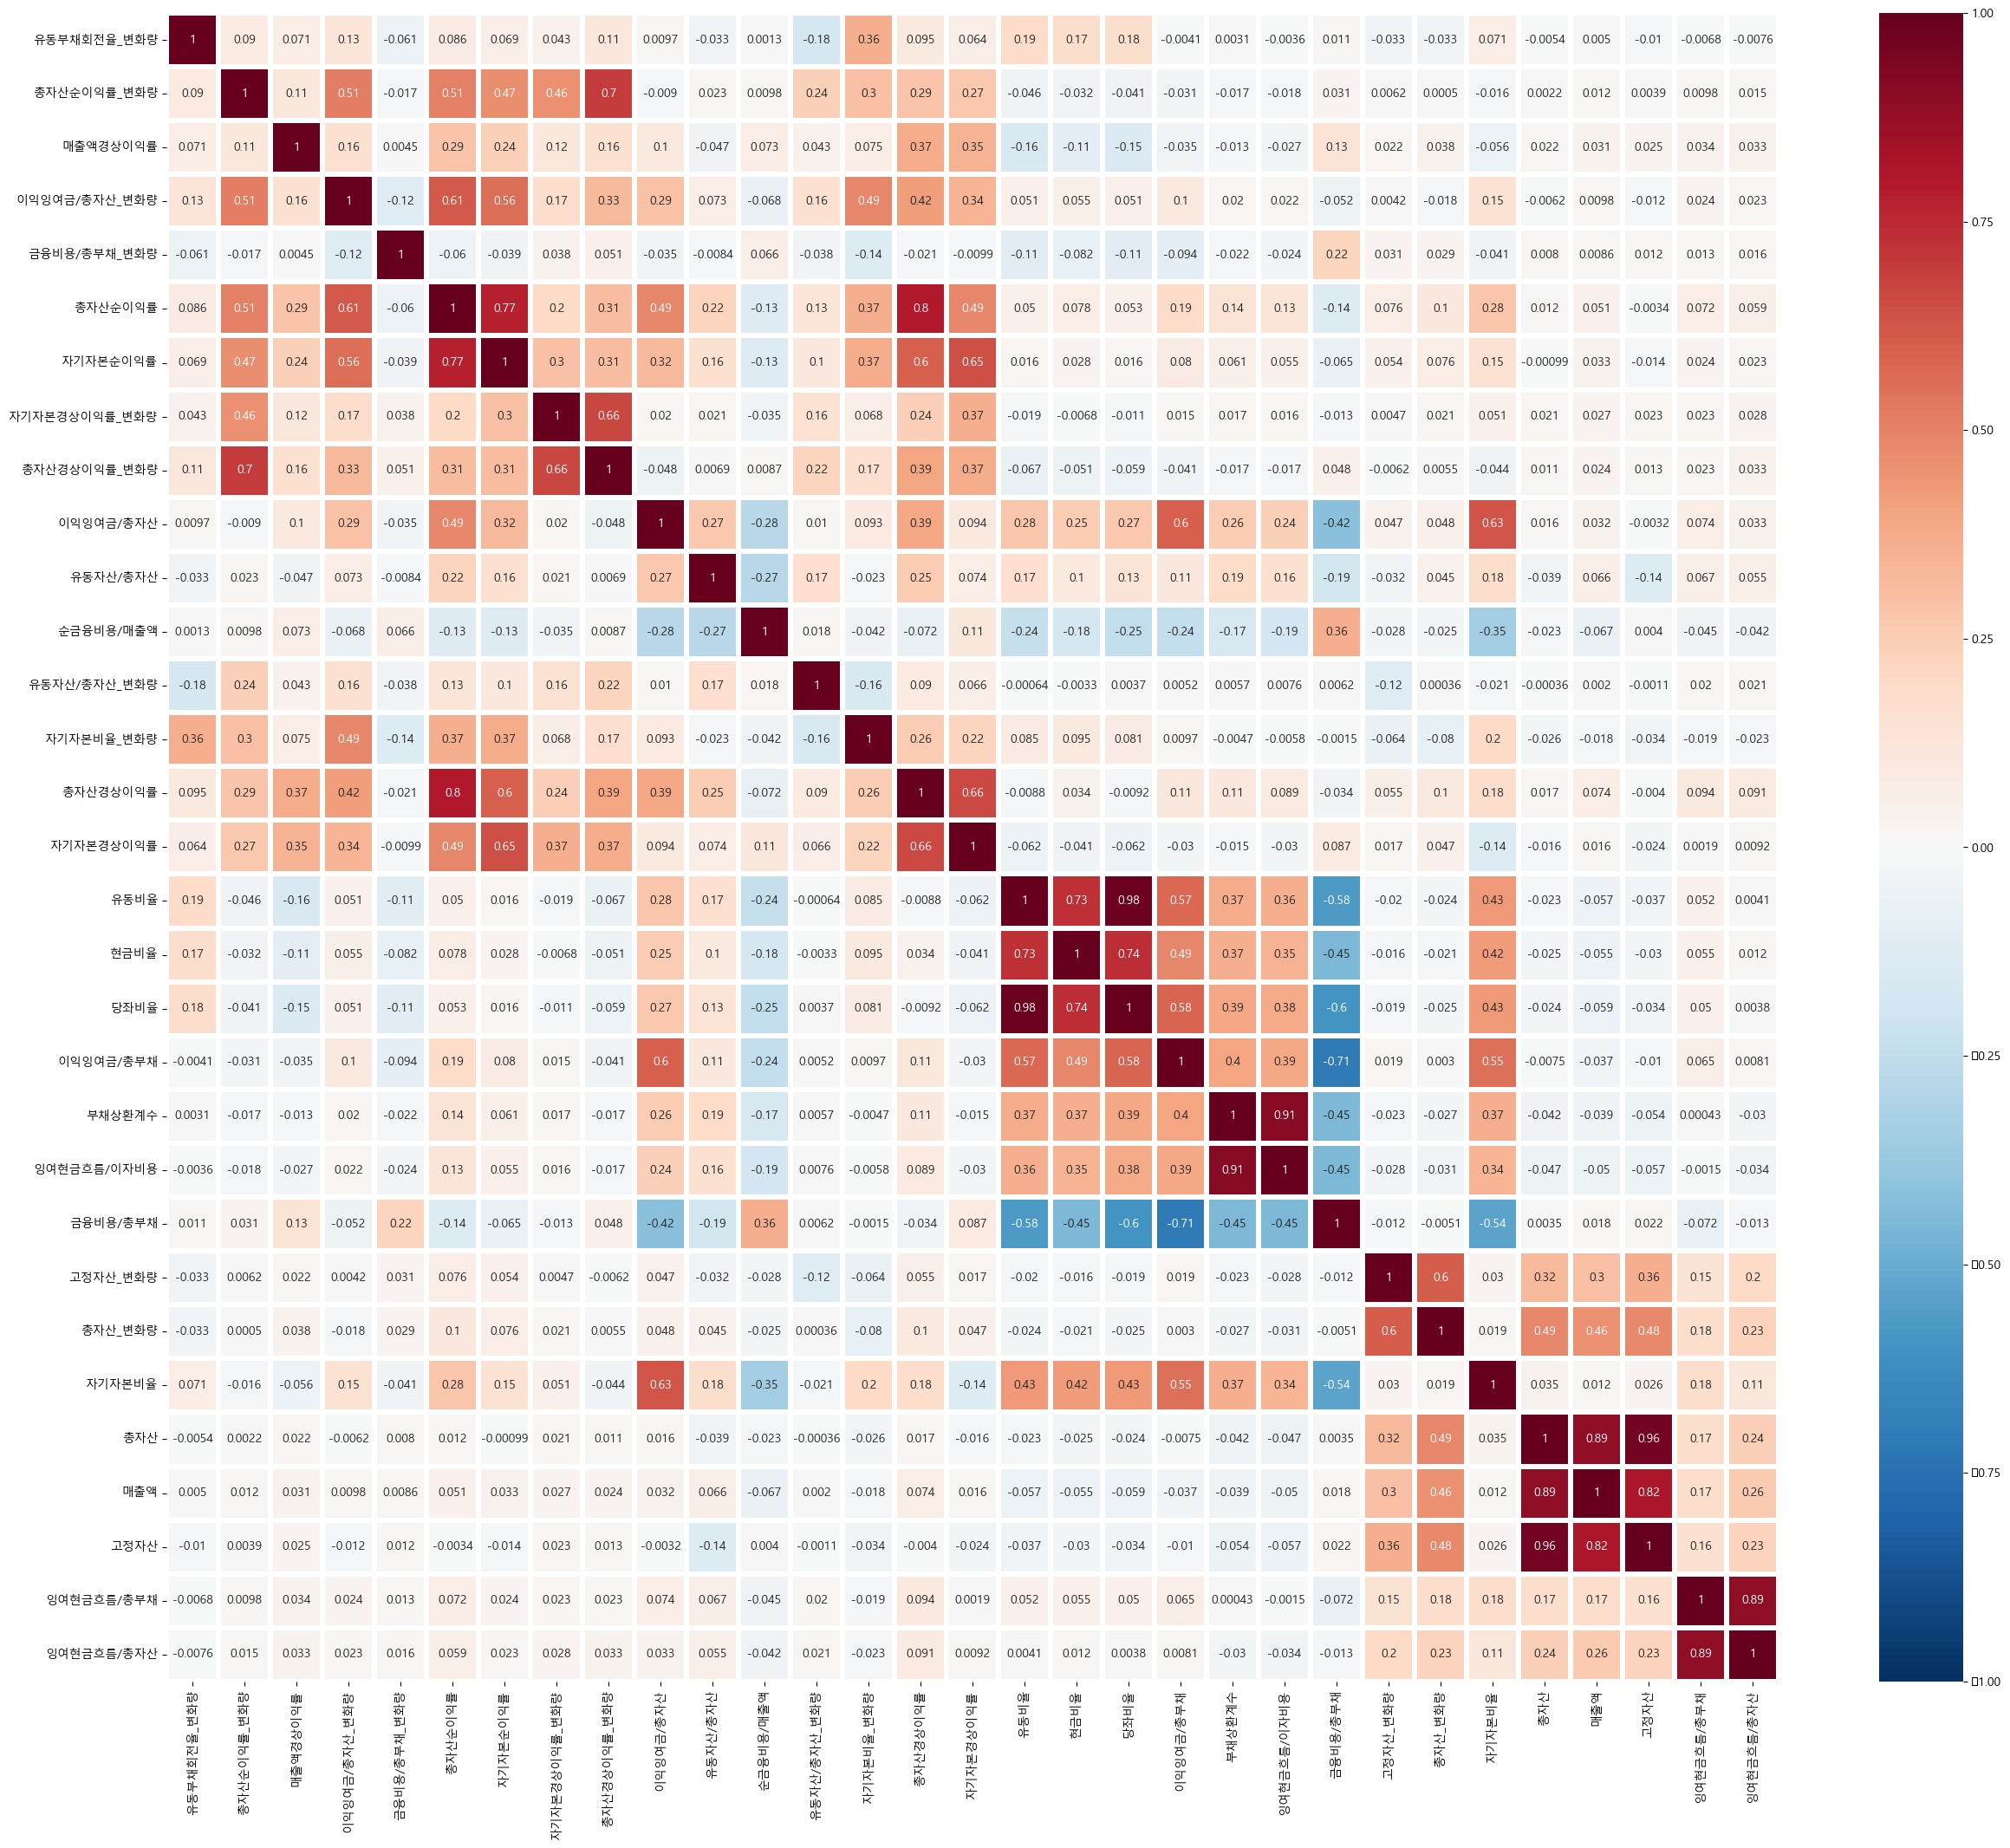

In [95]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (30,25))

    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'RdBu_r', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)
plot_cor(fea)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = train_Min.drop('부실여부',axis=1)
target = train['부실여부']

logit = SelectFromModel(LogisticRegression(),threshold='0.42*mean')
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
len(lr_feature)

31

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [133]:
# 12개 피처로 조정 C 값 조정
lasso = SelectFromModel(LogisticRegression(C=0.093, penalty='l1',solver='liblinear'))
lasso.fit(feature, target)
lasso_support = lasso.get_support()
lasso_feature = feature.loc[:,lasso_support].columns.tolist()

In [119]:
len(list(fea.columns))

31

In [134]:
len(lasso_feature)

31

In [122]:
len(lr_feature)

31

In [135]:
from collections import Counter
combined = list(fea.columns) + lasso_feature + lr_feature

# 각 요소의 개수를 세고, 2번 이상 등장하는 요소를 찾습니다.
counter = Counter(combined)
result = [item for item, count in counter.items() if count >= 3]

print(result)
len(result)

['유동부채회전율_변화량', '매출액경상이익률', '이익잉여금/총자산_변화량', '자기자본경상이익률_변화량', '총자산경상이익률_변화량', '이익잉여금/총자산', '순금융비용/매출액', '자기자본비율_변화량', '총자산경상이익률', '자기자본경상이익률', '당좌비율', '이익잉여금/총부채', '금융비용/총부채', '자기자본비율', '총자산', '매출액', '잉여현금흐름/총자산']


17

In [136]:
fea = train[['유동부채회전율_변화량', '총자산순이익률_변화량', '매출액경상이익률', '이익잉여금/총자산_변화량',
       '금융비용/총부채_변화량', '자기자본경상이익률_변화량',
       '총자산경상이익률_변화량', '이익잉여금/총자산', '유동자산/총자산', '순금융비용/매출액',
       '유동자산/총자산_변화량', '자기자본비율_변화량', '총자산경상이익률', '자기자본경상이익률',
       '현금비율', '당좌비율', '이익잉여금/총부채',
       '잉여현금흐름/이자비용',
       '고정자산_변화량', '총자산_변화량', '자기자본비율', '매출액', '고정자산',
       '잉여현금흐름/총부채', '잉여현금흐름/총자산']]

In [137]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 
                    
    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    # Reset the index
    vif = vif.reset_index().drop(columns='index')

    # Convert VIF Factor to a more readable format
    vif["VIF Factor"] = vif["VIF Factor"].apply(lambda x: '{:.2f}'.format(x))
    return vif

vif(fea)

,VIF Factor,features
0,82.66,고정자산_변화량
1,80.60,매출액경상이익률
2,79.29,총자산경상이익률_변화량
3,76.47,자기자본경상이익률_변화량
4,68.50,총자산_변화량
5,60.44,이익잉여금/총자산_변화량
6,59.61,총자산순이익률_변화량
7,52.41,자기자본경상이익률
8,44.55,이익잉여금/총자산
9,43.74,금융비용/총부채_변화량


c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


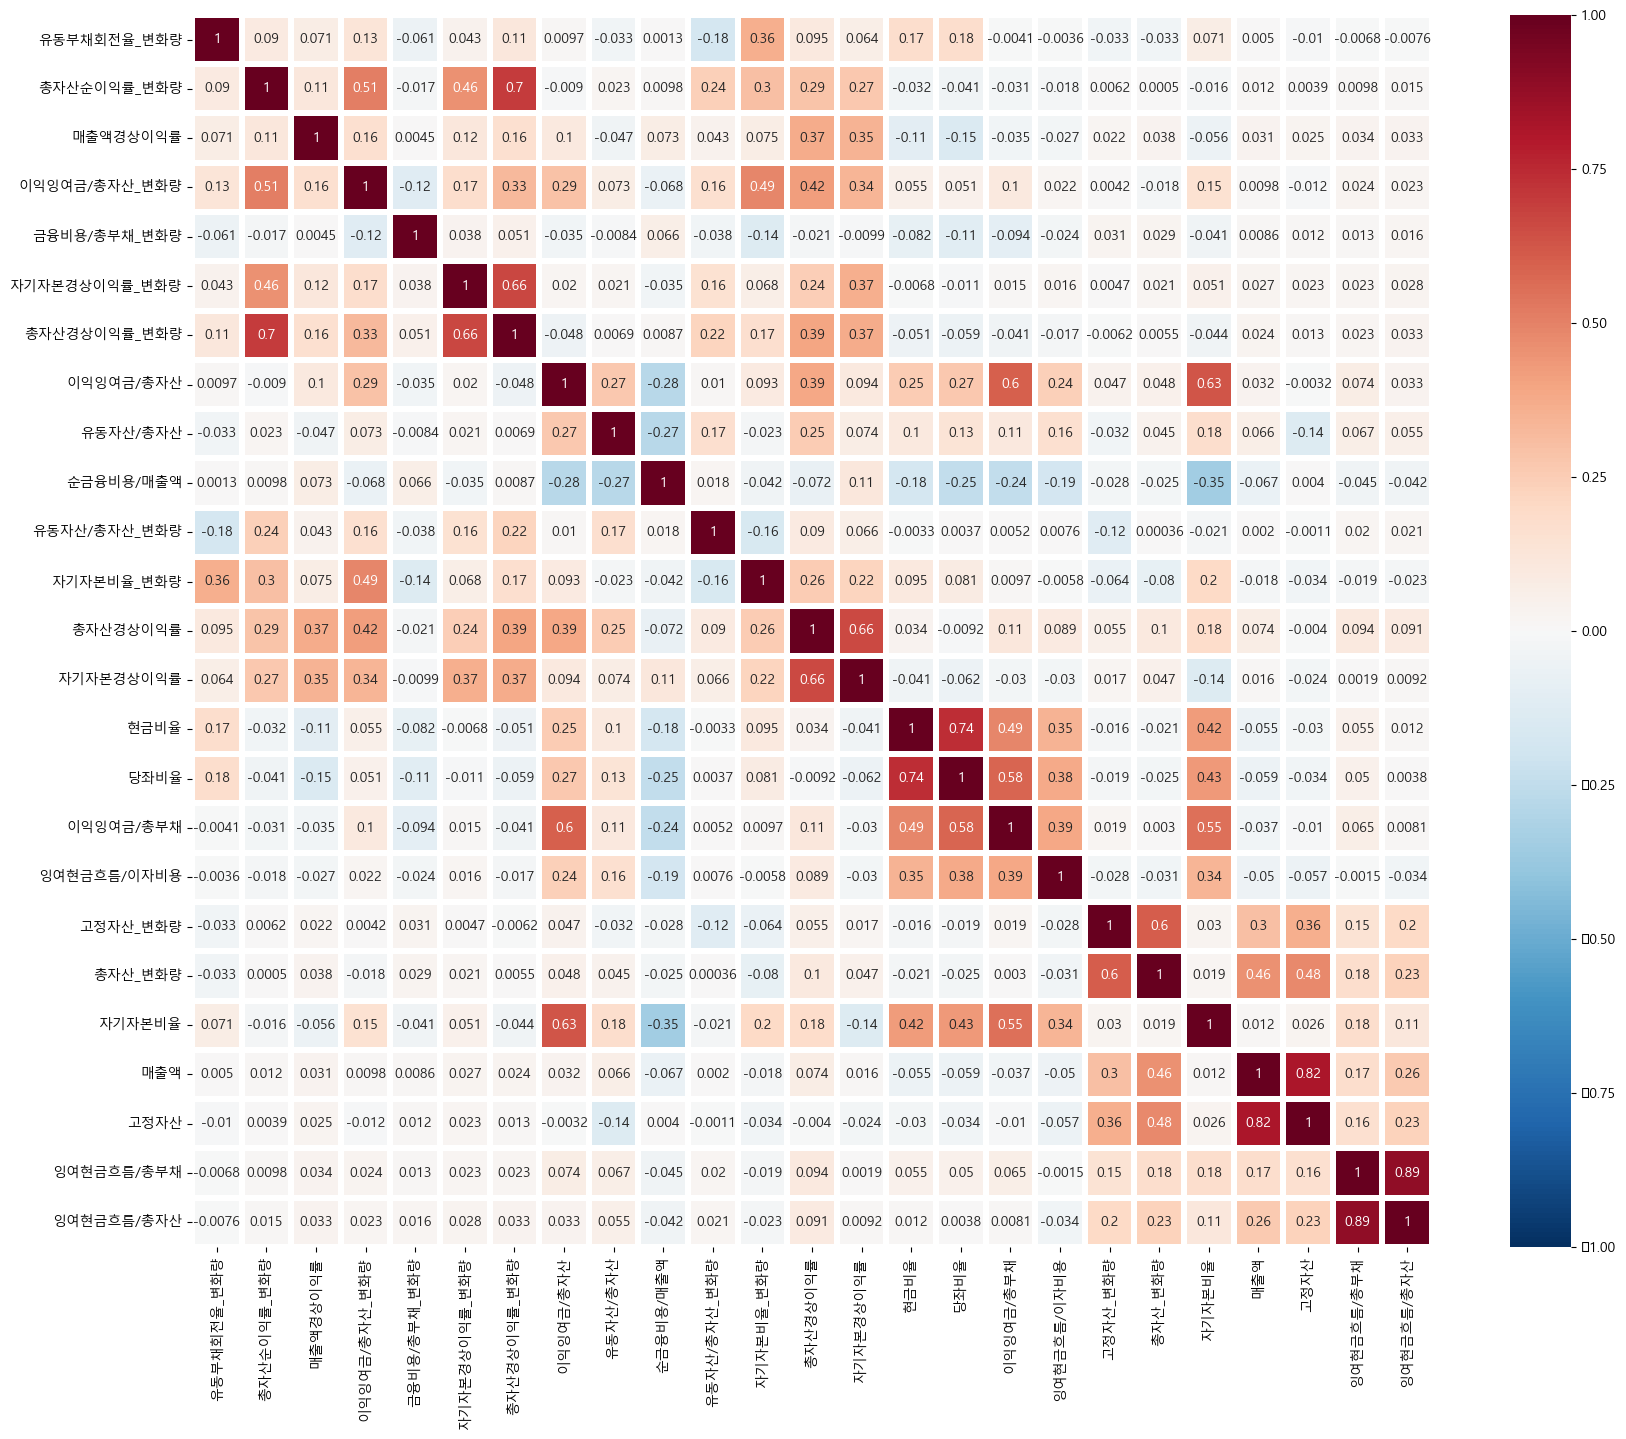

In [138]:
import seaborn as sns
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (20,16))

    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'RdBu_r', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)
plot_cor(fea)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = train_Min.drop('부실여부',axis=1)
target = train['부실여부']

logit = SelectFromModel(LogisticRegression(),threshold='0.47*mean')
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [150]:
len(lr_feature)

25

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [176]:
# 12개 피처로 조정 C 값 조정
lasso = SelectFromModel(LogisticRegression(C=0.0633, penalty='l1',solver='liblinear'))
lasso.fit(feature, target)
lasso_support = lasso.get_support()
lasso_feature = feature.loc[:,lasso_support].columns.tolist()

In [177]:
len(lasso_feature)

25

In [179]:
from collections import Counter
combined = list(fea.columns) + lasso_feature + lr_feature

# 각 요소의 개수를 세고, 2번 이상 등장하는 요소를 찾습니다.
counter = Counter(combined)
result = [item for item, count in counter.items() if count >= 2]

print(result)
len(result)

['유동부채회전율_변화량', '매출액경상이익률', '이익잉여금/총자산_변화량', '자기자본경상이익률_변화량', '총자산경상이익률_변화량', '이익잉여금/총자산', '유동자산/총자산', '순금융비용/매출액', '유동자산/총자산_변화량', '자기자본비율_변화량', '총자산경상이익률', '자기자본경상이익률', '당좌비율', '이익잉여금/총부채', '잉여현금흐름/이자비용', '고정자산_변화량', '자기자본비율', '매출액', '고정자산', '잉여현금흐름/총부채', '잉여현금흐름/총자산', '유동부채회전율', '총자산', '금융비용/매출액_변화량']


24